# POKEMON

### Analitika kitabxanalarının yüklənməsi və Datasetin Gətirilməsi

In [663]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_excel(r"D:\Handex\İcra Ediləcək layihələr\Python\Pokemon\Pokemon.xlsx")
df.head()

,#,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,is_legendary,generation,capture_rate,base_happiness,percentage_male
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,0.7,6.9,0,1,45,70,88.1
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1.0,13.0,0,1,45,70,88.1
2,3,Venusaur,grass,poison,625,80,100,123,122,120,80,2.0,100.0,0,1,45,70,88.1
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,0.6,8.5,0,1,45,70,88.1
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1.1,19.0,0,1,45,70,88.1


#### Datasetdə ən çox yayılmış Pokemon növü hansıdır? Bu tip nə qədər Pokemon var?

In [666]:
nov=df.groupby(['type1']).size().sort_values(ascending=False).reset_index().head(1)
nov.rename(columns={0: 'say'}, inplace=True)
nov

,type1,say
0,water,114


In [668]:
nov2=df.groupby(['type2']).size().sort_values(ascending=False).reset_index().head(1)
nov2.rename(columns={0: 'say'}, inplace=True)
nov2

,type2,say
0,flying,94


#### Digər növləri ilə müqayisədə həddindən artıq yüksək və ya aşağı statistikaya malik hər hansı Pokemon varmı?

In [671]:
q3=df['base_total'].quantile(0.75)
q1=df['base_total'].quantile(0.25)
iqr=df['base_total'].quantile(0.75)-df['base_total'].quantile(0.25)
upper=df['base_total'].quantile(0.75)+1.5*iqr
lower=df['base_total'].quantile(0.25)-1.5*iqr

outlier_df = df[(df['base_total'] < 42.5) | (df['base_total'] > 782.5)]
outlier_df['name'].count() 
if outlier_df['name'].count()>0:
    print(f'Digər növləri ilə müqayisədə həddindən artıq yüksək və ya aşağı statistikaya malik {outlier_df['name'].count()} pokemon var.')
else: 
    print(f'Digər növləri ilə müqayisədə həddindən artıq yüksək və ya aşağı statistikaya malik pokemon yoxdur.')

Digər növləri ilə müqayisədə həddindən artıq yüksək və ya aşağı statistikaya malik pokemon yoxdur.


#### Pokemonun capture rate ilə onun base total arasında əlaqə varmı? Bəs onun nadirliyi (legendary və ya deyil)?

In [674]:
if df['capture_rate'].corr(df['base_total'])>0.9:
    print('Pokemonun capture rate ilə onun base total arasında güclü əlaqə var')
elif df['capture_rate'].corr(df['base_total'])>0.5:
    print('Pokemonun capture rate ilə onun base total arasında zəif əlaqə var')
elif df['capture_rate'].corr(df['base_total'])<-0.9:
    print('Pokemonun capture rate ilə onun base total arasında güclü əks əlaqə var')
elif df['capture_rate'].corr(df['base_total'])<-0.5:
    print('Pokemonun capture rate ilə onun base total arasında zəif əks əlaqə var')
else:
    print('Pokemonun capture rate ilə onun base total arasında əlaqə yoxdur')
    
    


Pokemonun capture rate ilə onun base total arasında zəif əks əlaqə var


In [676]:
if df['capture_rate'].corr(df['is_legendary'])>0.9:
    print('Pokemonun capture rate ilə onun nadirliyi arasında güclü əlaqə var')
elif df['capture_rate'].corr(df['is_legendary'])>0.5:
    print('Pokemonun capture rate ilə onun nadirliyi arasında zəif əlaqə var')
elif df['capture_rate'].corr(df['is_legendary'])<-0.9:
    print('Pokemonun capture rate ilə onun nadirliyi arasında güclü eks əlaqə var')
elif df['capture_rate'].corr(df['is_legendary'])<-0.5:
    print('Pokemonun capture rate ilə onun nadirliyi arasında zəif eks əlaqə var')
else:
    print('Pokemonun capture rate ilə onun nadirliyi arasında əlaqə yoxdur')
    
    


Pokemonun capture rate ilə onun nadirliyi arasında əlaqə yoxdur


In [678]:
df[['capture_rate','base_total','is_legendary']].corr() 

,capture_rate,base_total,is_legendary
capture_rate,1.000000,-0.712120,-0.328212
base_total,-0.712120,1.000000,0.485811
is_legendary,-0.328212,0.485811,1.000000


#### Hansı Pokemon ən yüksək hücum statistikasına malikdir?

In [681]:
df.groupby(['attack'])['name'].max().tail(1).reset_index()

,attack,name
0,185,Heracross


#### Base total ilə HP, Attack, Defense, Special Attack, Special Defense və Speed kimi digər atributların hər biri arasında correlation nədir?

In [684]:
corr=df[['base_total','hp','attack','defense','sp_attack','sp_defense','speed',
         'height_m','weight_kg','is_legendary','generation','capture_rate','base_happiness','percentage_male']].corr() 

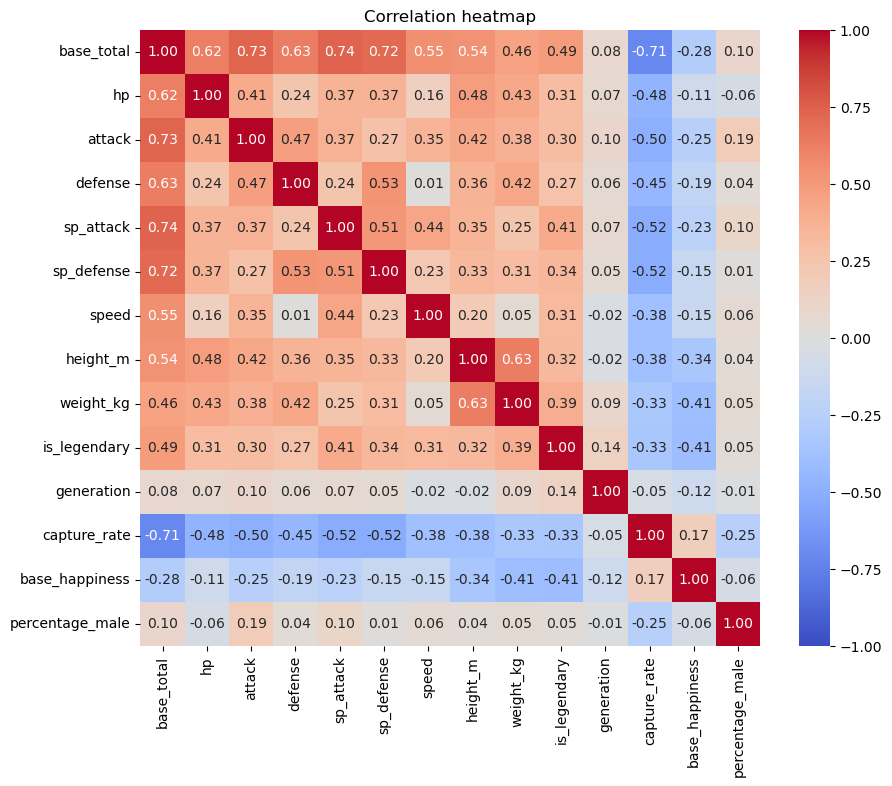

In [686]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()

#### Əfsanəvi və əfsanəvi olmayan Pokemonun ortalama hücum  arasında əhəmiyyətli fərq varmı?

In [688]:
leg_attack=df[df['is_legendary']==1]['attack'].mean()
non_leg_attack=df[df['is_legendary']==0]['attack'].mean()
print(df['attack'].describe(),f'leg_attack: {leg_attack}',f'non_leg_attack: {non_leg_attack}',sep='\n')
# umumi statistik deyerlere baxdiqda nadir pokemon nadir olmayandan hucum olaraq ehemiyyetli ferqlenir

count    800.000000
mean      77.830000
std       32.169391
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      185.000000
Name: attack, dtype: float64
leg_attack: 109.35714285714286
non_leg_attack: 74.80684931506849


#### Hansı tip 1 və tip 2 kombinasiyaları Pokemonlar arasında ən çox yayılmışdır?

In [690]:
df.groupby(['type1','type2']).size().sort_values(ascending=False).reset_index().head(1)


,type1,type2,0
0,normal,flying,26


#### Pokemonun çəkisi və boyu arasında korrelyasiya varmı?

In [695]:
df[['height_m','weight_kg']].corr() 

,height_m,weight_kg
height_m,1.000000,0.626623
weight_kg,0.626623,1.000000


In [696]:
if df['height_m'].corr(df['weight_kg'])>0.9:
    print('Pokemonun çəkisi və boyu arasında güclü əlaqə var')
elif df['height_m'].corr(df['weight_kg'])>0.5:
    print('Pokemonun çəkisi və boyu arasında zəif əlaqə var')
elif df['height_m'].corr(df['weight_kg'])<-0.9:
    print('Pokemonun çəkisi və boyu arasında güclü əks əlaqə var')
elif df['height_m'].corr(df['weight_kg'])<-0.5:
    print('Pokemonun çəkisi və boyu arasın da zəif əks əlaqə var')
else:
    print('Pokemonun çəkisi və boyu arasında əlaqə yoxdur')


Pokemonun çəkisi və boyu arasında zəif əlaqə var


#### Hansı nəsil (generation) ən yüksək ortalama sürətə malikdir?

In [700]:
df.groupby(['generation'])['speed'].mean().sort_values().tail(1)

generation
1    70.152318
Name: speed, dtype: float64

#### Base total paylanması əfsanəvi və əfsanəvi olmayan Pokemon arasında necə dəyişir?

In [703]:
df.groupby(['is_legendary'])['base_total'].mean()


is_legendary
0    410.358904
1    615.257143
Name: base_total, dtype: float64

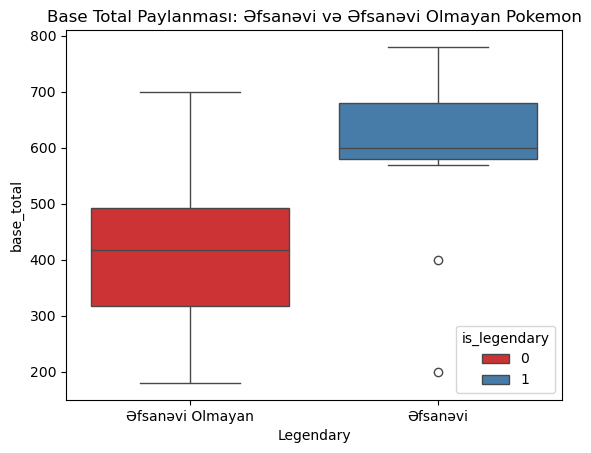

In [821]:
sns.boxplot(x='is_legendary', y='base_total', hue='is_legendary', data=df, palette='Set1')
plt.title('Base Total Paylanması: Əfsanəvi və Əfsanəvi Olmayan Pokemon')
plt.xticks(ticks=[0, 1], labels=['Əfsanəvi Olmayan', 'Əfsanəvi'])
plt.xlabel('Legendary')
plt.show()

#Hesablama və vizualdan göründüyü kimi əfsanəvi pokemonların ümumi balı kifayət qədər yüksəkdir

#### Müxtəlif Pokemon tipləri arasında Defense paylanmasında əhəmiyyətli fərq varmı?

In [714]:
max_Def=df.groupby(['type1','type2'])['defense'].mean().sort_values(ascending=False).head(1).reset_index()
max_Def

,type1,type2,defense
0,steel,ground,230.0


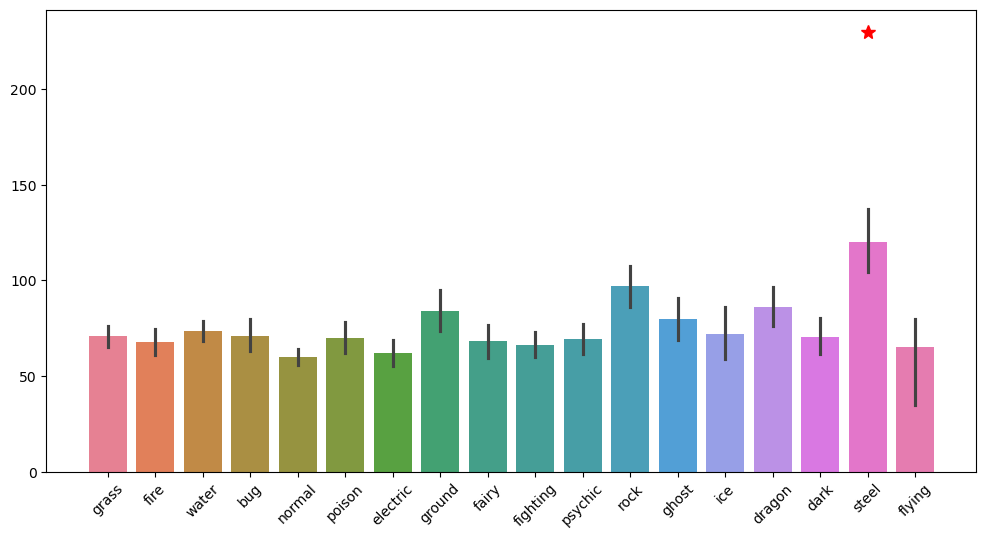

In [716]:
df2 = df.pivot( columns=['type1','type2'], values='defense')
plt.figure(figsize=(12, 6))
sns.barplot(df2)
plt.xticks(rotation=45)

plt.plot(max_Def['type1'], max_Def['defense'], "*", markersize=10, color="r") #max_defense
plt.show()

#### Pokemonun adını input kimi qəbul edən və onun statistikalarının olduğu lüğətini qaytaran funksiya yazın.

In [718]:
def pokemon_st():
    pokemon_name=input('Pokemon adini daxil edin:')
    data = df[df['name'].str.lower() == pokemon_name.lower()]
    data=data.loc[::,'base_total':'percentage_male']
    data=data.to_dict(orient='records')
    return data

    

pokemon_st()

Pokemon adini daxil edin: pikachu


[{'base_total': 320,
  'hp': 35,
  'attack': 55,
  'defense': 40,
  'sp_attack': 50,
  'sp_defense': 50,
  'speed': 90,
  'height_m': 0.4,
  'weight_kg': 6.0,
  'is_legendary': 0,
  'generation': 1,
  'capture_rate': 190,
  'base_happiness': 70,
  'percentage_male': 50.0}]

#### Percentage_male sütununda boş dəyərləri öz tipinin ortalaması ilə doldurun

In [825]:
df['percentage_male'].fillna(df['percentage_male'].mean(), inplace = True)
df['percentage_male']

0      88.100000
1      88.100000
2      88.100000
3      88.100000
4      88.100000
         ...    
795    55.155761
796    55.155761
797    55.155761
798    55.155761
799    55.155761
Name: percentage_male, Length: 800, dtype: float64

#### Daha çox kişiyə yaxın olan pokemonlar daha güclüdür, yoxsa qadına yaxın olanlar?

In [725]:
df['percentage_male'].sort_values()

412      0.0
29       0.0
30       0.0
237      0.0
668      0.0
       ...  
640    100.0
641    100.0
644    100.0
380    100.0
236    100.0
Name: percentage_male, Length: 800, dtype: float64

In [727]:
data3=pd.pivot_table(df,index='name',values=['attack','percentage_male']).reset_index()
data3

,name,attack,percentage_male
0,Abomasnow,132.0,50.000000
1,Abra,20.0,75.400000
2,Absol,150.0,50.000000
3,Accelgor,70.0,50.000000
4,Aegislash,150.0,50.000000
...,...,...,...
795,Zoroark,105.0,88.100000
796,Zorua,65.0,88.100000
797,Zubat,45.0,50.000000
798,Zweilous,85.0,50.000000


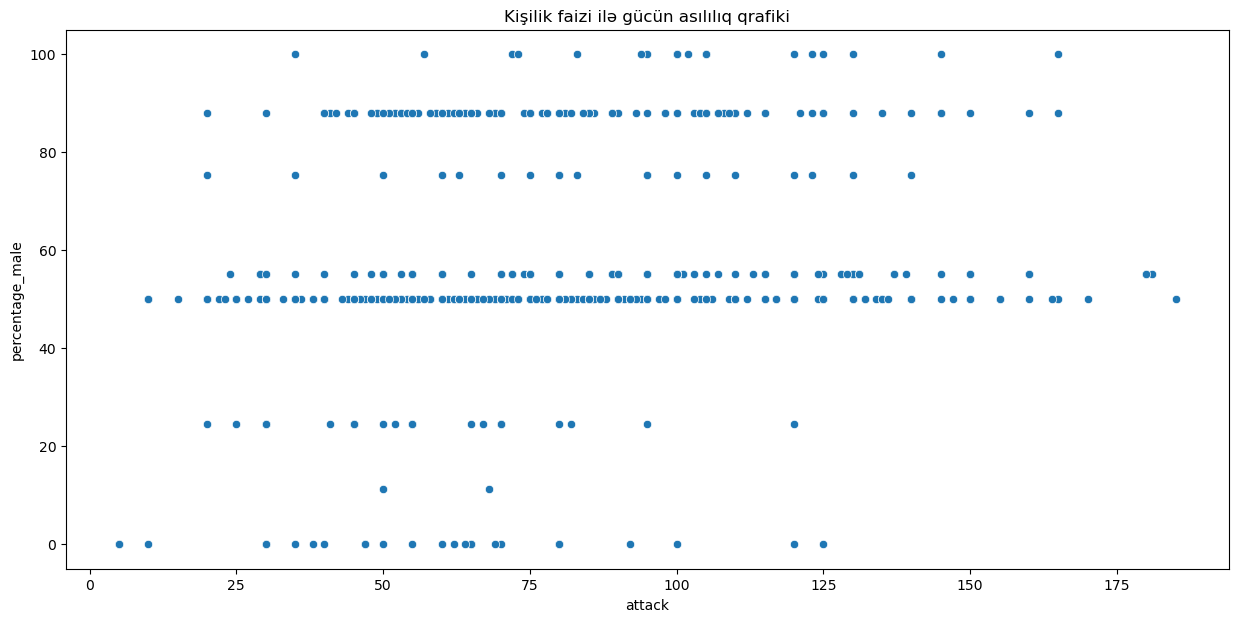

In [729]:
plt.figure(figsize = (15,7))
sns.scatterplot(x='attack', y='percentage_male',data=data3)
plt.title('Kişilik faizi ilə gücün asılılıq qrafiki')
plt.show()

#Nəticə olaraq kişilik faizi 1ə yaxın olanların gücü 0a yaxın olanlardan daha yüksəkdir

#### Əfsanəvi və ya əfsanəvi olmayan pokemonların ortalama çəkiləri və boyları arasında önəmli bir fərq var?

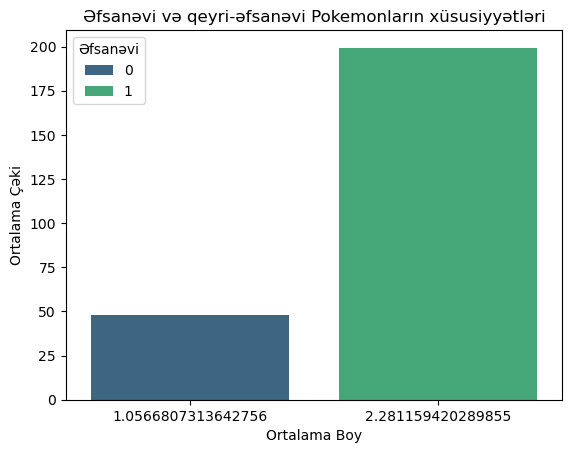

In [732]:
data2=pd.pivot_table(df,index='is_legendary',values=['height_m','weight_kg'],aggfunc='mean')
sns.barplot(x='height_m', y='weight_kg', hue='is_legendary', data=data2, palette='viridis')
plt.title('Əfsanəvi və qeyri-əfsanəvi Pokemonların xüsusiyyətləri')
plt.xlabel('Ortalama Boy')
plt.ylabel('Ortalama Çəki')
plt.legend(title='Əfsanəvi')
plt.show()


#Göründüyü kimi əfsanəvi pokemonlar ciddi fərqlə əfsanəvi olmayan pokemonlardan çəki və boy olaraq daha çoxdur.

#### Hansı tip1 və tip2 kombinasiyası daha xoşbəxtdir?

In [735]:
df.groupby(['type1','type2'])['base_happiness'].mean().sort_values().tail(1).reset_index()

,type1,type2,base_happiness
0,fire,water,100.0


#### Tiplər üzrə ortalama çəki və boyları tapın

In [738]:
h=df.groupby(['type1'])['height_m'].mean()
w=df.groupby(['type1'])['weight_kg'].mean()
pd.concat([h,w],axis=1).reset_index()

,type1,height_m,weight_kg
0,bug,0.883333,33.083333
1,dark,1.296552,69.096552
2,dragon,1.937037,107.125926
3,electric,0.981579,37.944737
4,fairy,0.794444,23.555556
5,fighting,1.196429,58.675000
6,fire,1.168000,66.096000
7,flying,1.166667,52.000000
8,ghost,1.251852,69.570370
9,grass,0.938961,33.255844


#### Mən oynamaq üçün ən ideal pokemonu seçmək istəsəm, hansını seçməliyəm? Bunun üçün özünüzə uyğun xüsusi bir analiz aparın və seçdiyiniz pokemonu əsaslandırın

In [741]:
max_attack=df.groupby(['name'])['attack'].max().sort_values().tail(10).reset_index()             #top 10 attack
max_attack_df=df[df['name'].isin(max_attack['name'])]
max_defense=max_attack_df.groupby(['name'])['defense'].max().sort_values().tail(5).reset_index() #top 5 defense
max_defense_df=max_attack_df[max_attack_df['name'].isin(max_defense['name'])]
data=max_defense_df[max_defense_df['is_legendary']==1]                                           #legendary
data['name'].loc[data['base_total'].max()==data['base_total']]                                   #max base_total


#Mənə lazım idi ən güclü top 10 pokemon. Onlar arasından ən dözümlü 5 pokemon seçdim.
#Analizlərimizdən bildiyimiz kimi əfsanəvi pokemonlar daha yüksək statistikaya malik olduğuna görə əfsanəvilər arasından da 
#ortalama statistikası ən yüksək olanı ideal pokemon seçdim.

382    Groudon
Name: name, dtype: object

#### Apardığınız analizlərin nəticəsinə uyğun olaraq vizuallaşdırmalar aparın və bir dashboard qurun

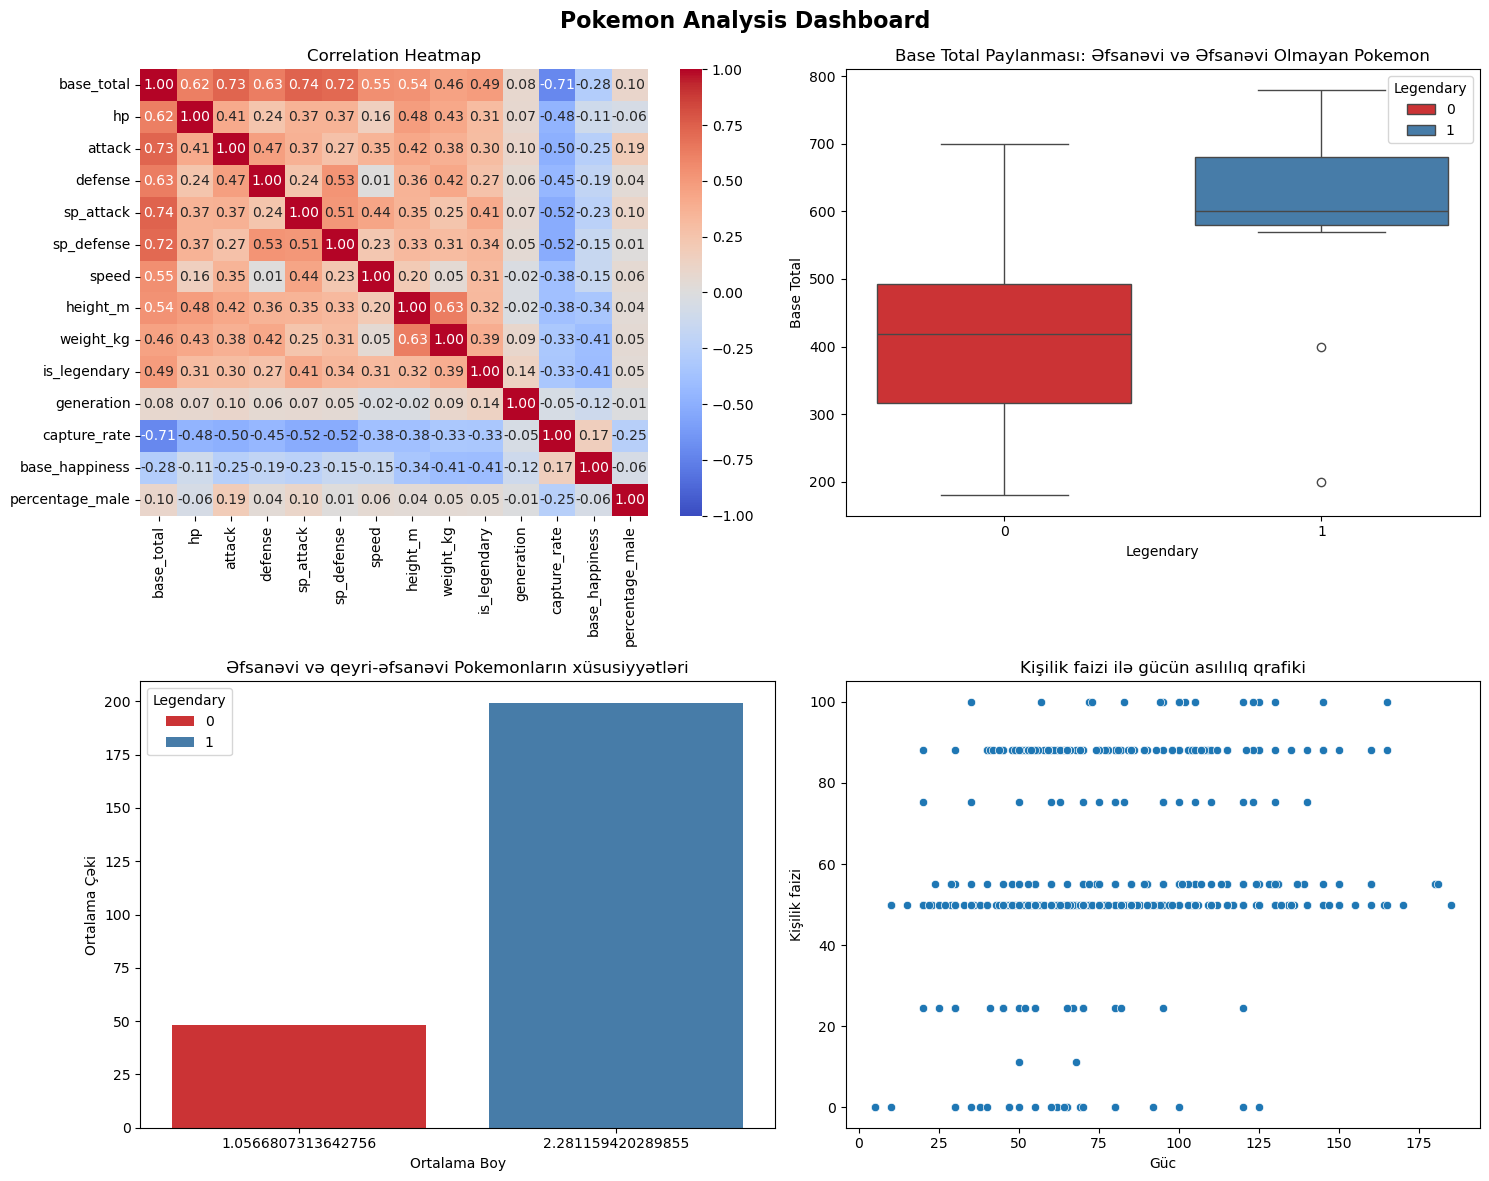

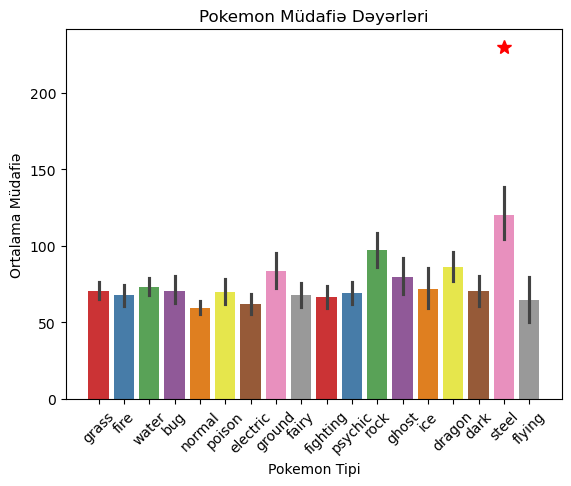

In [819]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 1. Correlation Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, ax=axs[0, 0])
axs[0, 0].set_title('Correlation Heatmap')

# 2. Boxplot
sns.boxplot(x='is_legendary', y='base_total', data=df, hue='is_legendary', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Base Total Paylanması: Əfsanəvi və Əfsanəvi Olmayan Pokemon')
axs[0, 1].set_xlabel('Legendary')
axs[0, 1].set_ylabel('Base Total')
axs[0, 1].legend(title='Legendary')



# 3. Bar Qrafiki
sns.barplot(x='height_m', y='weight_kg', hue='is_legendary', data=data2, palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Əfsanəvi və qeyri-əfsanəvi Pokemonların xüsusiyyətləri')
axs[1, 0].set_xlabel('Ortalama Boy')
axs[1, 0].set_ylabel('Ortalama Çəki')
axs[1, 0].legend(title='Legendary')


# 4. Scatter Qrafiki
sns.scatterplot(x='attack', y='percentage_male', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Kişilik faizi ilə gücün asılılıq qrafiki')
axs[1, 1].set_xlabel('Güc')
axs[1, 1].set_ylabel('Kişilik faizi')


plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Pokemon Analysis Dashboard', fontsize=16, fontweight='bold')
plt.show()

# 5. Bar Qrafiki
sns.barplot(data=df2, palette='Set1')
plt.xticks(rotation=45)

plt.plot(max_Def['type1'], max_Def['defense'], "*", markersize=10, color="r")  # max_defense
plt.title('Pokemon Müdafiə Dəyərləri')
plt.xlabel('Pokemon Tipi')
plt.ylabel('Ortalama Müdafiə')
plt.show()